In [34]:
import pandas as pd
import warnings 

%matplotlib inline
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns

mag = pd.read_sas("PBCD_J.XPT")

print(mag.head())

      SEQN  LBXBPB  LBDBPBSI      LBDBPBLC  LBXBCD  LBDBCDSI      LBDBCDLC  \
0  93703.0     NaN       NaN           NaN     NaN       NaN           NaN   
1  93704.0     NaN       NaN           NaN    0.07      0.62  1.000000e+00   
2  93705.0    2.98      0.14  5.397605e-79    0.24      2.14  5.397605e-79   
3  93706.0    0.74      0.04  5.397605e-79    0.21      1.87  5.397605e-79   
4  93707.0    0.39      0.02  5.397605e-79    0.14      1.25  5.397605e-79   

   LBXTHG  LBDTHGSI      LBDTHGLC  LBXBSE  LBDBSESI      LBDBSELC  LBXBMN  \
0     NaN       NaN           NaN     NaN       NaN           NaN     NaN   
1    0.47      2.35  5.397605e-79  142.28      1.81  5.397605e-79    9.41   
2    1.07      5.34  5.397605e-79  185.71      2.36  5.397605e-79    8.57   
3   10.64     53.09  5.397605e-79  199.44      2.53  5.397605e-79   14.07   
4    0.20      1.00  1.000000e+00  179.34      2.28  5.397605e-79   12.60   

   LBDBMNSI      LBDBMNLC  
0       NaN           NaN  
1    171.28 

In [35]:
depression = pd.read_sas("DPQ_J.XPT")
print(depression.head())

      SEQN        DPQ010        DPQ020        DPQ030        DPQ040  \
0  93705.0  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
1  93706.0  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
2  93708.0  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
3  93709.0           NaN           NaN           NaN           NaN   
4  93711.0  1.000000e+00  5.397605e-79  1.000000e+00  5.397605e-79   

         DPQ050        DPQ060        DPQ070        DPQ080        DPQ090  \
0  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
1  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
2  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
3           NaN           NaN           NaN           NaN           NaN   
4  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   

         DPQ100  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4  5.397605e-79  


In [36]:
data_compare = pd.merge(mag, depression, how = "inner", on = "SEQN")
data_compare.head()

,SEQN,LBXBPB,LBDBPBSI,LBDBPBLC,LBXBCD,LBDBCDSI,LBDBCDLC,LBXTHG,LBDTHGSI,LBDTHGLC,...,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100
0,93705.0,2.98,0.14,5.397605e-79,0.24,2.14,5.397605e-79,1.07,5.34,5.397605e-79,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN
1,93706.0,0.74,0.04,5.397605e-79,0.21,1.87,5.397605e-79,10.64,53.09,5.397605e-79,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN
2,93708.0,1.53,0.07,5.397605e-79,0.73,6.49,5.397605e-79,15.23,76.00,5.397605e-79,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN
3,93709.0,1.31,0.06,5.397605e-79,1.08,9.61,5.397605e-79,0.41,2.05,5.397605e-79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93711.0,2.15,0.10,5.397605e-79,0.38,3.38,5.397605e-79,0.20,1.00,1.000000e+00,...,1.000000e+00,5.397605e-79,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79


In [37]:
row_count= len(data_compare)
print(row_count)

5533


In [38]:
data_compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5533 entries, 0 to 5532
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5533 non-null   float64
 1   LBXBPB    5264 non-null   float64
 2   LBDBPBSI  5264 non-null   float64
 3   LBDBPBLC  5264 non-null   float64
 4   LBXBCD    5264 non-null   float64
 5   LBDBCDSI  5264 non-null   float64
 6   LBDBCDLC  5264 non-null   float64
 7   LBXTHG    5264 non-null   float64
 8   LBDTHGSI  5264 non-null   float64
 9   LBDTHGLC  5264 non-null   float64
 10  LBXBSE    5264 non-null   float64
 11  LBDBSESI  5264 non-null   float64
 12  LBDBSELC  5264 non-null   float64
 13  LBXBMN    5264 non-null   float64
 14  LBDBMNSI  5264 non-null   float64
 15  LBDBMNLC  5264 non-null   float64
 16  DPQ010    5094 non-null   float64
 17  DPQ020    5093 non-null   float64
 18  DPQ030    5093 non-null   float64
 19  DPQ040    5092 non-null   float64
 20  DPQ050    5092 non-null   floa

In [39]:
data_frame = pd.DataFrame({"ID": data_compare["SEQN"], 
                           "Lack of Interest": data_compare["DPQ010"],
                           "Feeling Depressed": data_compare["DPQ020"],
                           "Suicide Ideation": data_compare["DPQ090"],
                           "Affect on Daily Life": data_compare["DPQ100"],
                           "Blood Mercury (ug/L)": data_compare["LBXTHG"],
                           "Blood Manganese (ug/L)": data_compare["LBXBMN"]
                            })
data_frame.head()

,ID,Lack of Interest,Feeling Depressed,Suicide Ideation,Affect on Daily Life,Blood Mercury (ug/L),Blood Manganese (ug/L)
0,93705.0,5.397605e-79,5.397605e-79,5.397605e-79,NaN,1.07,8.57
1,93706.0,5.397605e-79,5.397605e-79,5.397605e-79,NaN,10.64,14.07
2,93708.0,5.397605e-79,5.397605e-79,5.397605e-79,NaN,15.23,15.09
3,93709.0,NaN,NaN,NaN,NaN,0.41,11.88
4,93711.0,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,0.20,6.55


In [40]:
data_frame.dropna(inplace =True)
print(data_frame)

            ID  Lack of Interest  Feeling Depressed  Suicide Ideation  \
4      93711.0      1.000000e+00       5.397605e-79      5.397605e-79   
5      93712.0      5.397605e-79       5.397605e-79      5.397605e-79   
6      93713.0      1.000000e+00       1.000000e+00      5.397605e-79   
7      93714.0      1.000000e+00       5.397605e-79      5.397605e-79   
8      93715.0      5.397605e-79       5.397605e-79      5.397605e-79   
...        ...               ...                ...               ...   
5521  102934.0      5.397605e-79       5.397605e-79      5.397605e-79   
5523  102943.0      5.397605e-79       5.397605e-79      5.397605e-79   
5526  102947.0      5.397605e-79       5.397605e-79      5.397605e-79   
5530  102953.0      1.000000e+00       1.000000e+00      5.397605e-79   
5532  102956.0      1.000000e+00       1.000000e+00      5.397605e-79   

      Affect on Daily Life  Blood Mercury (ug/L)  Blood Manganese (ug/L)  
4             5.397605e-79                  0.20

In [41]:
data_frame.drop(data_frame[(data_frame["Blood Mercury (ug/L)"] == 9 ) & (data_frame["Suicide Ideation"] == 9)].index, inplace =True)
print(data_frame)

            ID  Lack of Interest  Feeling Depressed  Suicide Ideation  \
4      93711.0      1.000000e+00       5.397605e-79      5.397605e-79   
5      93712.0      5.397605e-79       5.397605e-79      5.397605e-79   
6      93713.0      1.000000e+00       1.000000e+00      5.397605e-79   
7      93714.0      1.000000e+00       5.397605e-79      5.397605e-79   
8      93715.0      5.397605e-79       5.397605e-79      5.397605e-79   
...        ...               ...                ...               ...   
5521  102934.0      5.397605e-79       5.397605e-79      5.397605e-79   
5523  102943.0      5.397605e-79       5.397605e-79      5.397605e-79   
5526  102947.0      5.397605e-79       5.397605e-79      5.397605e-79   
5530  102953.0      1.000000e+00       1.000000e+00      5.397605e-79   
5532  102956.0      1.000000e+00       1.000000e+00      5.397605e-79   

      Affect on Daily Life  Blood Mercury (ug/L)  Blood Manganese (ug/L)  
4             5.397605e-79                  0.20

In [42]:
# changed the values for the indicators to whole number integers so it is easier to compare
# you can see what the values represent in the data table discription in the links provided
# https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DPQ_J.htm#DPQ100
data_frame = data_frame.astype({"Feeling Depressed":int,
                                "Lack of Interest": int,
                                "Suicide Ideation": int,
                                "Affect on Daily Life": int,
                                "Blood Manganese (ug/L)": float,
                                "ID": float,
                                "Blood Mercury (ug/L)": float})
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3234 entries, 4 to 5532
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3234 non-null   float64
 1   Lack of Interest        3234 non-null   int32  
 2   Feeling Depressed       3234 non-null   int32  
 3   Suicide Ideation        3234 non-null   int32  
 4   Affect on Daily Life    3234 non-null   int32  
 5   Blood Mercury (ug/L)    3234 non-null   float64
 6   Blood Manganese (ug/L)  3234 non-null   float64
dtypes: float64(3), int32(4)
memory usage: 151.6 KB


In [43]:
data_frame.drop(data_frame[data_frame["Feeling Depressed"] ==9].index, inplace = True)  
data_frame.drop(data_frame[data_frame["Suicide Ideation"] ==9].index, inplace = True)

In [44]:
counts = data_frame["Feeling Depressed"].value_counts()
print(counts)

counts2 = data_frame["Suicide Ideation"].value_counts()
print(counts2)

Feeling Depressed
0    2056
1     806
2     213
3     157
Name: count, dtype: int64
Suicide Ideation
0    3051
1     128
2      32
3      21
Name: count, dtype: int64


<Axes: title={'center': 'Blood Mercury (ug/L)'}, xlabel='Suicide Ideation'>

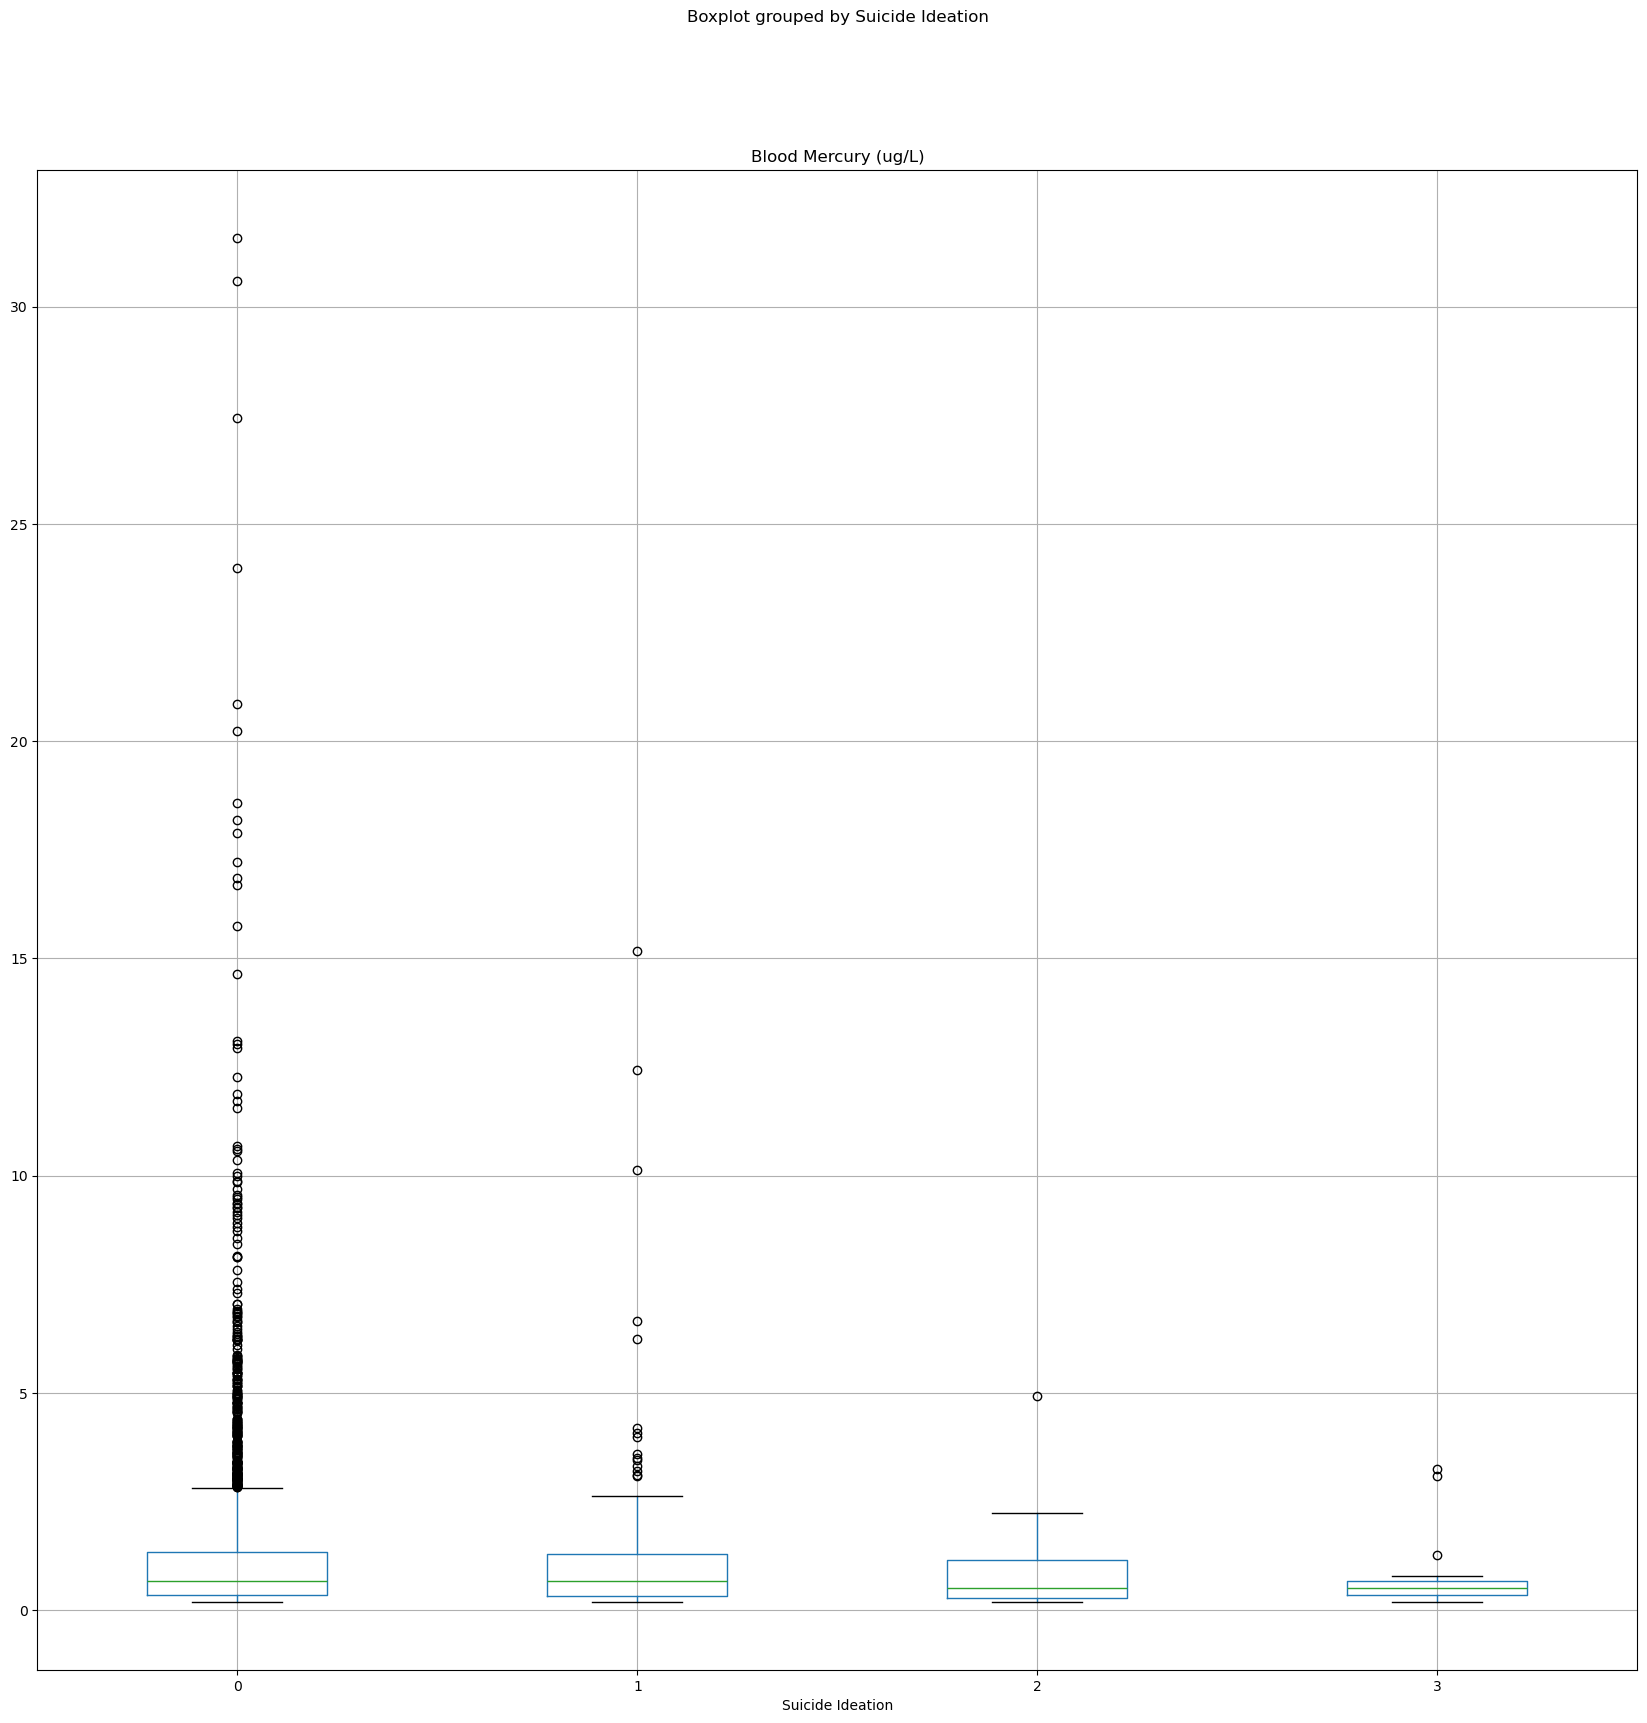

In [45]:
# the normal level of manganese in the blood is between 4-15 ug/L according to google
data_frame.boxplot("Blood Mercury (ug/L)", by= "Suicide Ideation", figsize= (20,20))

In [46]:
level0 = data_frame[data_frame["Suicide Ideation"]== 0]["Blood Mercury (ug/L)"]
level1 = data_frame[data_frame["Suicide Ideation"]== 1]["Blood Mercury (ug/L)"]
level2 = data_frame[data_frame["Suicide Ideation"]== 2]["Blood Mercury (ug/L)"]
level3 = data_frame[data_frame["Suicide Ideation"]== 3]["Blood Mercury (ug/L)"]


In [47]:
# using ANOVA because we are comparing more than 2 groups
# since the p value is ~0.35 this means that there is no statistical difference between the variables compared
ANOVAtable = stats.f_oneway(level0, level1, level2, level3,)
print(ANOVAtable)

if (ANOVAtable.pvalue > .25 and ANOVAtable.pvalue < .45):
    print("There is no statistical difference between the variables compared")

else:
    print("There is a statistical difference between the variables compared")

F_onewayResult(statistic=0.8544457479466804, pvalue=0.46406328931479246)
There is a statistical difference between the variables compared


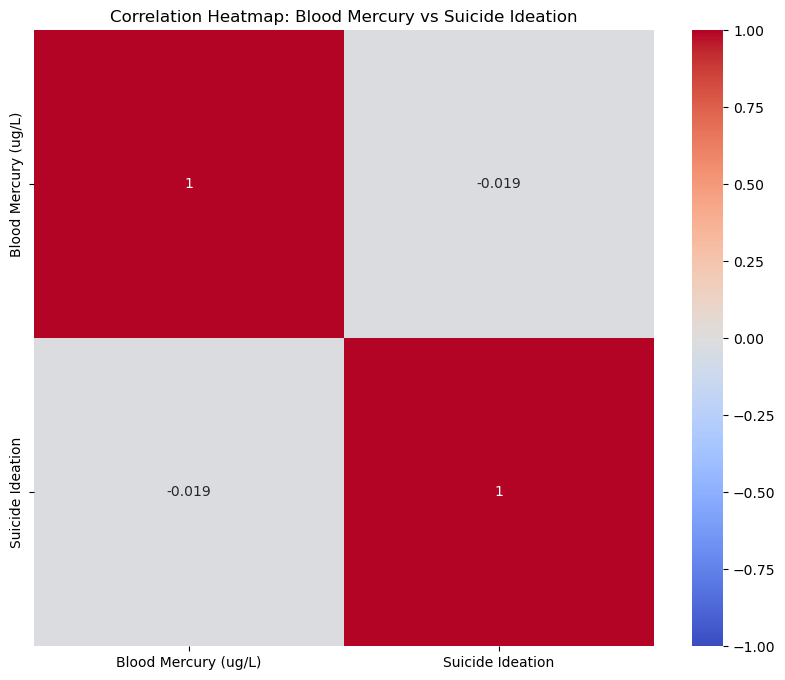

Pearson Correlation Coefficient: -0.0187
Spearman Correlation Coefficient: -0.0196
P-value: 0.2656
Interpretation: Weak negative correlation


In [48]:
 # Assuming you have your data in a DataFrame called 'data_frame'
# If not, you'll need to load your data first
 
# Calculate the correlation coefficient
correlation = data_frame['Blood Mercury (ug/L)'].corr(data_frame['Suicide Ideation'])
 
# Perform Spearman correlation test
spearman_corr, p_value = stats.spearmanr(data_frame['Blood Mercury (ug/L)'], data_frame['Suicide Ideation'])

# Pearson Correlation Test
pearson_corr = data_frame['Blood Mercury (ug/L)'].corr(data_frame['Suicide Ideation'])
 
# Create a correlation matrix
corr_matrix = data_frame[['Blood Mercury (ug/L)', 'Suicide Ideation']].corr()
 
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
 
# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
 
# Set title
plt.title('Correlation Heatmap: Blood Mercury vs Suicide Ideation')
 
# Show the plot
plt.show()
 
# Print Spearman correlation results
print(f"Pearson Correlation Coefficient: {pearson_corr:.4f}")
print(f"Spearman Correlation Coefficient: {spearman_corr:.4f}")
print(f"P-value: {p_value:.4f}")
 
# Interpret the correlation
def interpret_correlation(coeff):
    if abs(coeff) > 0.7:
        return "Strong"
    elif abs(coeff) > 0.3:
        return "Moderate"
    else:
        return "Weak"
 
print(f"Interpretation: {interpret_correlation(spearman_corr)} {'positive' if spearman_corr > 0 else 'negative'} correlation")

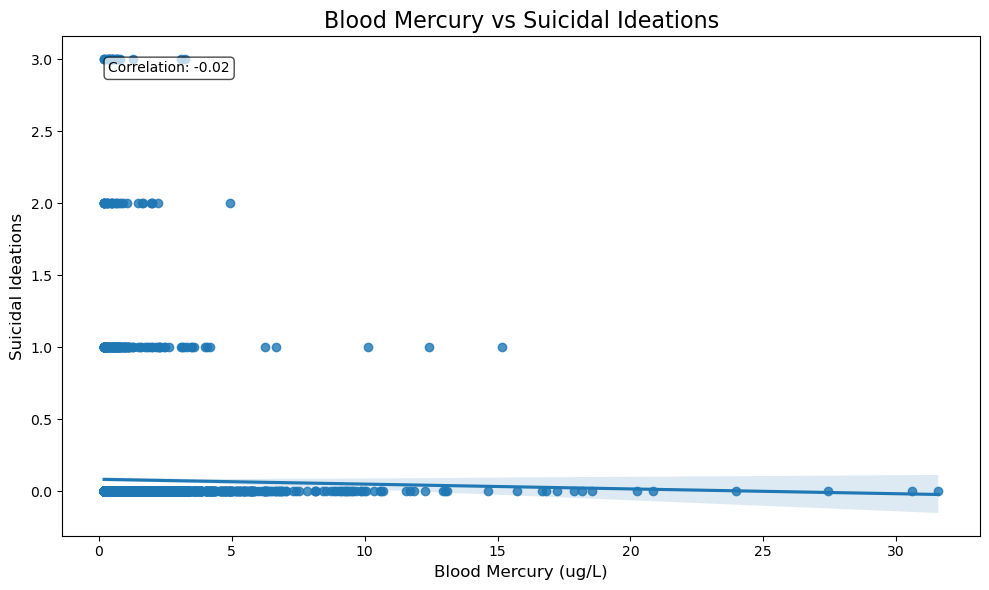

In [49]:
# Assuming you have your data in a DataFrame called 'data_frame'
# If not, you'll need to load your data first
# For this example, we'll create a sample DataFrame

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))
 
# Create the scatter plot with regression line
sns.regplot(x='Blood Mercury (ug/L)', y='Suicide Ideation', data=data_frame, ax=ax)
 
# Customize the plot
ax.set_title('Blood Mercury vs Suicidal Ideations', fontsize=16)
ax.set_xlabel('Blood Mercury (ug/L)', fontsize=12)
ax.set_ylabel('Suicidal Ideations', fontsize=12)
 
# Add a text box with correlation information
correlation = data_frame['Blood Mercury (ug/L)'].corr(data_frame['Suicide Ideation'])
ax.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=ax.transAxes, 
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
 
# Adjust layout and display the plot
plt.tight_layout()
plt.show()